# Auto-sklearn Avocado

#### Goal :

- Create a ML model using Auto-sklearn for the Avocado dataset
- Get RMSE over the predictions of these model

#### Imports

In [19]:
import pandas as pd
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from math import sqrt
import autosklearn.regression
import time

X_train = pd.read_csv('../../Data/avocado_price/processed/x_train.csv')
y_train = pd.read_csv('../../Data/avocado_price/processed/y_train.csv')
X_test = pd.read_csv('../../Data/avocado_price/processed/x_test.csv')
y_test = pd.read_csv('../../Data/avocado_price/processed/y_test.csv')

One of the features of Auto-sklearn is to indicate if features are "categorical" or "numerical"

In [2]:
#we took these list of feature from Script/California_house
list_of_categorical="type_organic,type_conventional,region"
list_of_categorical=list_of_categorical.split(",")
feature_types=[]
for (col_name,col_data) in X_train.iteritems():
    if (col_name in list_of_categorical):
        feature_types.append("Categorical")
    else:
        feature_types.append("Numerical")

We create our model and look at the time it took for doing it.

In [3]:
start = time.time()
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30
)
automl.fit(X_train, y_train, dataset_name='avoca',
           feat_type=feature_types)

elapsed_time=(time.time()-start)

/opt/conda/lib/python3.7/site-packages/autosklearn/automl.py:917: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Will change shape via np.ravel().
  y = self._check_y(y)


[WARNING] [2020-06-22 12:19:45,566:AutoMLSMBO(1)::avoca] Could not find meta-data directory /opt/conda/lib/python3.7/site-packages/autosklearn/metalearning/files/r2_regression_dense


Display of :
- time it took for creating the model
- RMSE of created model over the testing dataset

In [17]:
print(automl.show_models())
predictions = automl.predict(X_test.values)
print("rmse score:", sqrt(sklearn.metrics.mean_squared_error(y_test, predictions)))
print("elapsed time:",elapsed_time)

[(1.000000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'ridge_regression', 'regressor:ridge_regression:alpha': 0.1265650933230963, 'regressor:ridge_regression:fit_intercept': 'True', 'regressor:ridge_regression:tol': 0.076963514229007},
dataset_properties={
  'task': 4,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'regression',
  'signed': False})),
]
rmse score: 25.481879860989096
elapsed time: 115.20937180519104


# Residual Plot

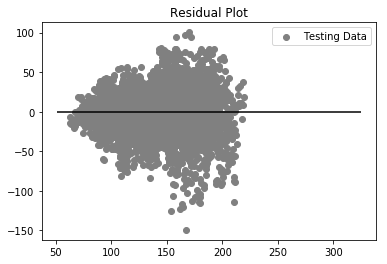

In [20]:
import matplotlib.pyplot as plt

#plot residuals
plt.scatter(predictions, predictions - y_test.AveragePrice.values, c="grey", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()